# Machine Learning with Scikit Learn

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Supervised learning is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data.

2 kinds of supervised learning:
- Classification: target variable consists of categories
- Regression: target variable is continuous

Feature = predictor variable = independent variable
Target variable = dependent variable = response variable

Before using supervised learning:
- no missing values
- numeric format
- data stored in pandas dataframe or numpy arrays

EDA to be performed before doing supervised learning

> Scikit-learn follows the same syntax for all the models

```
from sklearn.module import Model

model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
print(predictions)
```

# Classification

1. Build a model
2. Model learns from the labeled data
3. Pass unlabel data to the model as input
4. Model predicts the labels of unseen data

## k-Nearest Neighbors (KNN)

Predicts the label of a data point by
- Looking at the k closest labeled data points
- Taking a majority vote


In [ ]:
churn = pd.read_csv('../data/telecom_churn_clean.csv')
churn.head()

In [ ]:
sns.scatterplot(data=churn, x='account_length', y='customer_service_calls', hue='churn')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# the .values converts the dataFrames into numpy arrays
X = churn[['account_length', 'customer_service_calls']].values
y = churn.churn.values

print(X.shape)
print(y.shape)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X, y)

In [ ]:
X_new=np.array([[1, 1],
                [0, 0], 
               [-1, -1]])
print(X_new)

In [ ]:
predictions = knn.predict(X_new)
print(predictions)

The `n_neighbors` parameter in a K-Nearest Neighbors (KNN) model specifies the number of closest data points (neighbors) the model considers when making a prediction. Here’s how it impacts the model:

1. **Small `n_neighbors` (e.g., 1 or 2):** The model becomes highly sensitive to noise in the data, as predictions are based on very few neighbors. This can lead to overfitting.

2. **Large `n_neighbors` (e.g., 10 or more):** The model becomes more robust to noise by averaging over more neighbors, but it may also oversmooth the data, potentially missing patterns and leading to underfitting.

In summary, `n_neighbors` controls the trade-off between bias and variance: a small value can capture more complex patterns but may be too sensitive to noise, while a large value smooths out noise but may miss finer details.


## Measuring model performance

Accuracy is a commonly used metric

$$
    accuracy = {correct\_predictions \over total\_observations}
$$

Split data into training and test set. Evaluation has to be performed on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

In [ ]:
print(knn.score(X_test, y_test))

Lets try different n values

In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors =  np.arange(1, 26)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)


In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors,test_accuracies.values(),  label="Test Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Introduction to Regression

In these kinds of problems the response variable is typically continuous.

In [ ]:
diabetes_df = pd.read_csv('../data/diabetes_clean.csv')
diabetes_df

In [ ]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df.glucose.values

In [ ]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

In [ ]:
# Since the predictor must be a 2 dimensional array to be accepted by sklearn... 

X_bmi = X_bmi.reshape(-1,1)
print(y.shape, X_bmi.shape)

In [ ]:
plt.scatter(X_bmi, y)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, predictions)
plt.ylabel('Blood glucose')
plt.xlabel('Body mass index')



In [ ]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df.glucose.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)



The default metric for linear regression is $R^2$ which quantifies the variance in target values explained by the features

How to calculate $R^2$ in scikit-learn?


In [ ]:
reg.score(X_test, y_test)

Another helpful measure is the MSE (Mean Squared Error)

$$
 \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 
$$
where:
- $n$ is the number of data points,
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value.

The MSE is measured in target units, squared.

The RMSE, (root square of the MSE) is in the same units as the target variable.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)


## Cross Validation

**Cross-Validation** is a technique used to assess the performance of a machine learning model. The process involves the following steps:

1. **Split the Data**: Divide the dataset into `k` subsets (folds).
2. **Train and Validate**:
    - For each fold:
        - Use `k-1` folds to train the model.
        - Use the remaining fold to validate the model.
3. **Repeat**: Repeat the process `k` times, with each fold used exactly once as the validation data.
4. **Average the Results**: Calculate the performance metric (e.g., accuracy, MSE) for each fold and average the results.

This method ensures that every data point is used for both training and validation, providing a more reliable estimate of the model's performance.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)

reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=kf)

cv_results

These are $R^2$ 

In [ ]:
print(np.mean(cv_results), np.std(cv_results))

In [ ]:
print(np.quantile(cv_results, [0.025, 0.975]))

## Regularized Regression

### Ridge Regression

**Ridge Regression** adds regularization to the Ordinary Least Squares (OLS) method to address multicollinearity and overfitting. The main differences are:

1. **Regularization Term**:
    - Ridge Regression introduces a penalty term to the OLS cost function.
    - The modified cost function is: 

    $$ \text{Ridge Cost Function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

    where:
    - $y_i$ is the actual value.
    - $\hat{y}_i$ is the predicted value.
    - $\beta_j$ are the model coefficients.
    - $\lambda$ is the regularization parameter controlling the strength of the penalty.

2. **Impact of Regularization**:
    - The penalty term $\lambda \sum_{j=1}^{p} \beta_j^2$ shrinks the coefficients $\beta_j$ towards zero, reducing their variance.
    - This helps in reducing model complexity and prevents overfitting, especially when the number of predictors $p$ is large or when predictors are highly correlated.

3. **Trade-off**:
    - The choice of $\lambda$ determines the trade-off between fitting the training data well (low bias) and keeping the model coefficients small (low variance).
    - As $\lambda$ increases, the bias increases, but variance decreases, leading to a more robust model.

In summary, Ridge Regression enhances OLS by adding a regularization term that penalizes large coefficients, thereby improving model generalization and addressing issues of multicollinearity and overfitting.


In [ ]:
from sklearn.linear_model import Ridge

scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_predict = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores)

### Lasso Regression 

**Lasso Regression** adds regularization to the Ordinary Least Squares (OLS) method, similar to Ridge Regression, but with a key difference in the penalty term. The main features of Lasso Regression are:

1. **Regularization Term**:
    - Lasso Regression introduces an $L1$ penalty term to the OLS cost function.
    - The modified cost function is: 

    $$
    \text{Lasso Cost Function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
    $$

    where:
    - $y_i$ is the actual value.
    - $\hat{y}_i$ is the predicted value.
    - $\beta_j$ are the model coefficients.
    - $\lambda$ is the regularization parameter controlling the strength of the penalty.

2. **Impact of Regularization**:
    - The $L1$ penalty term $\lambda \sum_{j=1}^{p} |\beta_j|$ encourages sparsity in the model coefficients, meaning it can drive some coefficients to exactly zero.
    - This results in a simpler model that performs feature selection by excluding irrelevant features.

3. **Trade-off**:
    - The choice of $\lambda$ determines the trade-off between fitting the training data well (low bias) and maintaining sparsity in the coefficients (low variance).
    - As $\lambda$ increases, more coefficients are set to zero, leading to a sparser model.

4. **Key Difference from Ridge Regression**:
    - While Ridge Regression (with its $L2$ penalty) shrinks coefficients towards zero, Lasso Regression (with its $L1$ penalty) can shrink coefficients exactly to zero, effectively performing variable selection.

In summary, Lasso Regression enhances OLS by adding an $L1$ regularization term that promotes sparsity in the model coefficients, improving model interpretability and feature selection, while addressing issues of overfitting.



In [ ]:
from sklearn.linear_model import Lasso

scores = []

for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_predict = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

print(scores)

In [ ]:
# Lets perform feature selection 

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df.glucose.values

names=  diabetes_df.drop('glucose', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## Measuring Model Performance

Accuracy is not always the best metric: doesnt perform well in case of imbalance data.

Confusion matrix is important to calculate metrics like accuracy, precision, recall...

# Confusion Matrix and Related Metrics

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

The matrix itself is $2 \times 2$ for binary classification and has the following form:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP)  | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)  |

- **True Positive (TP):** The number of correct predictions that the occurrence is positive.
- **True Negative (TN):** The number of correct predictions that the occurrence is negative.
- **False Positive (FP):** The number of incorrect predictions that the occurrence is positive.
- **False Negative (FN):** The number of incorrect predictions that the occurrence is negative.

## Metrics Derived from the Confusion Matrix

Several metrics can be calculated from the values in the confusion matrix, providing different perspectives on the performance of the classifier:

### Accuracy

Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

### Precision (Positive Predictive Value)

Precision is the proportion of true positive results in all predicted positive cases.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### Recall (Sensitivity or True Positive Rate)

Recall is the proportion of true positive results in all actual positive cases.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### F1 Score

The F1 Score is the harmonic mean of precision and recall, providing a balance between the two metrics.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Specificity (True Negative Rate)

Specificity is the proportion of true negative results in all actual negative cases.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

### False Positive Rate (FPR)

The False Positive Rate is the proportion of false positive results in all actual negative cases.

$$
\text{False Positive Rate} = \frac{FP}{FP + TN}
$$

### False Negative Rate (FNR)

The False Negative Rate is the proportion of false negative results in all actual positive cases.

$$
\text{False Negative Rate} = \frac{FN}{FN + TP}
$$


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)

churn = pd.read_csv('../data/telecom_churn_clean.csv')
churn.head()

In [ ]:
X = churn.drop('churn', axis=1).values
y = churn.churn.values

print(len(X), len(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print(len(X_train), len(y_train))

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

# Logistic Regression

Used for classification problems

Outputs probabilities (values between 0 and 1)

If the output p $\ge$ then the output is labeled as 1. Otherwise, 0

Logistic regression provides a linear decision boundary.

In [135]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print(len(X_train), len(y_train))

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[0])

2333 2333
0.36500608703922677


By default, the logistic regresion threshold is 0.5

We can use the ROC curve to see how different thresholds afect the output

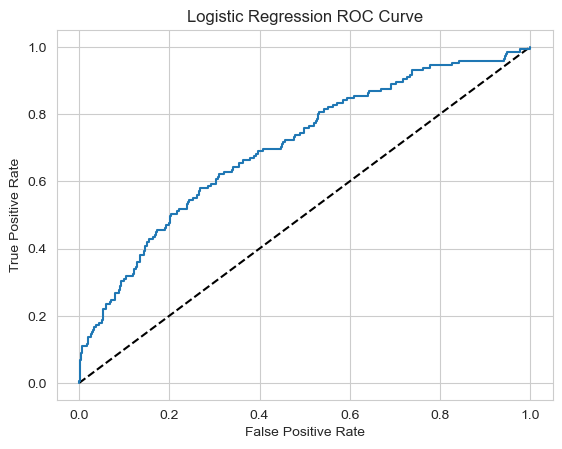

In [137]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ROC Curve for Logistic Regression

## ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

### True Positive Rate (TPR) or Recall

The True Positive Rate, also known as Recall or Sensitivity, is the proportion of actual positives that are correctly identified by the classifier.

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

### False Positive Rate (FPR)

The False Positive Rate is the proportion of actual negatives that are incorrectly identified as positives by the classifier.

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

## Interpreting the ROC Curve

- **X-axis (False Positive Rate):** Represents the rate of false positives. It ranges from 0 to 1.
- **Y-axis (True Positive Rate):** Represents the rate of true positives. It also ranges from 0 to 1.

A classifier that randomly guesses has an ROC curve that is a diagonal line from (0, 0) to (1, 1). A good classifier stays as far away from that line as possible, towards the top-left corner.

## Area Under the Curve (AUC)

The Area Under the ROC Curve (AUC) is a single scalar value that summarizes the performance of the classifier across all thresholds. The AUC can be interpreted as the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

- **AUC = 1.0:** Perfect classifier.
- **AUC = 0.5:** Classifier that performs no better than random guessing.
- **0.5 < AUC < 1.0:** Classifier performs better than random guessing.

## ROC Curve for Logistic Regression

Logistic regression outputs probabilities. By varying the decision threshold, different points on the ROC curve can be generated. For example:

- **Threshold = 0.5:** The default threshold. Instances with a predicted probability greater than 0.5 are classified as positive.
- **Lower Threshold:** More instances are classified as positive, increasing both TPR and FPR.
- **Higher Threshold:** Fewer instances are classified as positive, decreasing both TPR and FPR.

The ROC curve for logistic regression is generated by calculating the TPR and FPR at different thresholds, and plotting these points.

### Example of ROC Curve Points Calculation

Let's assume we have the following confusion matrix at different thresholds:

1. **Threshold = 0.2:**

   - TP = 90
   - FP = 30
   - TN = 70
   - FN = 10

   $$
   \text{TPR} = \frac{90}{90 + 10} = 0.9
   $$

   $$
   \text{FPR} = \frac{30}{30 + 70} = 0.3
   $$

2. **Threshold = 0.5:**

   - TP = 70
   - FP = 10
   - TN = 90
   - FN = 30

   $$
   \text{TPR} = \frac{70}{70 + 30} = 0.7
   $$

   $$
   \text{FPR} = \frac{10}{10 + 90} = 0.1
   $$

3. **Threshold = 0.8:**

   - TP = 50
   - FP = 5
   - TN = 95
   - FN = 50

   $$
   \text{TPR} = \frac{50}{50 + 50} = 0.5
   $$

   $$
   \text{FPR} = \frac{5}{5 + 95} = 0.05
   $$

By plotting these points $(0.3, 0.9)$, $(0.1, 0.7)$, and $(0.05, 0.5)$ on the ROC curve, and continuing this process for other thresholds, the complete ROC curve is obtained.


In [139]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))

0.7020931639443436
